In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import warnings
import numpy as np

import argparse

mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

In [8]:
dataset_name = 'cifar100_60'
#input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0, on_bad_lines='skip')

qs_names = dataframe['qs'].unique()
print(qs_names.__class__)

<class 'numpy.ndarray'>


In [9]:
query_strategy_names = dataframe['qs'].unique()
print(query_strategy_names)

['RandomSampling' nan 'UncertaintySampling' 'DiscriminativeAL' 'CoreSet'
 'TypiClust' 'Badge']


In [10]:
result_score = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['score'].agg(['mean', 'std']).set_axis(['s_mean', 's_std'], axis=1)
result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(['t_mean', 't_std'], axis=1)
typiclust = result_time.loc['TypiClust']
print(result_time)

                                                t_mean     t_std
qs                  batch_size n_cycles step                    
Badge               16.0       60.0     0.0   0.846879  0.003741
                                        1.0   1.080824  0.041869
                                        2.0   1.226318  0.051921
                                        3.0   1.323826  0.050083
                                        4.0   1.351373  0.027500
...                                                ...       ...
UncertaintySampling 16.0       60.0     55.0  3.206668  0.723422
                                        56.0  3.311286  0.792888
                                        57.0  3.081688  0.874863
                                        58.0  3.246137  0.823277
                                        59.0  3.195814  0.904916

[360 rows x 2 columns]


In [11]:
# input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0, on_bad_lines='skip')
dataframe = dataframe.dropna()

query_strategy_names = dataframe['qs'].unique()

result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(
    ['t_mean', 't_std'], axis=1)
b = result_time.loc['Badge']
qs_result_t_mean = b['t_mean'].to_numpy()
print(qs_result_t_mean)

[0.84687853 1.08082385 1.22631788 1.32382598 1.35137272 1.46581359
 1.51756034 1.68862705 1.84149194 1.82884459 1.95366693 2.06221089
 2.18544559 2.34561296 2.35053153 2.26997509 2.29217343 2.32337213
 2.32749672 2.47065535 2.48012013 2.40729761 2.62603369 2.63029995
 2.65645399 2.64819102 2.6097785  2.6410028  2.69653606 2.78225279
 2.66232033 2.73592818 2.73221736 2.78396926 2.77661576 2.78868923
 2.73455119 2.85871935 2.82703118 2.88293047 2.8809175  2.91116176
 2.89923887 2.94437556 3.01415033 3.00756035 3.01885357 3.00535407
 3.02700577 3.0318449  3.11620569 3.06848378 3.28185196 3.14381828
 3.17023711 3.19406543 3.25026131 3.19857821 3.44147749 3.3892005 ]


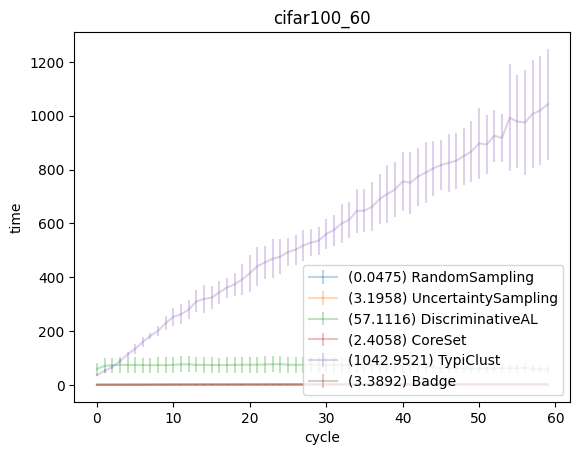

In [12]:
for qs_name in query_strategy_names:
    qs_result_t = result_time.loc[qs_name]
    qs_result_t_mean = qs_result_t['t_mean'].to_numpy()
    qs_result_t_std = qs_result_t['t_std'].to_numpy()

    plt.errorbar(np.arange(len(qs_result_t_mean)), qs_result_t_mean, qs_result_t_std,
                 label=f"({qs_result_t_mean[-1]:.4f}) {qs_name}", alpha=0.3)

plt.title(dataset_name)
plt.legend(loc='lower right')
plt.xlabel('cycle')
plt.ylabel('time')
# output_path = f'{dataset_name}_time.png'
output_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/result/{dataset_name}_time.png'
plt.savefig(output_path)